<div style="border:1px solid black; padding:10px 10px;">
    <strong>CIVIL-321 "Modélisation Numérique des Solides et Structures"</strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">Comment utiliser ce Jupyter Notebook?
    </span><br/><br/>
    Ce <strong>Notebook</strong> est constitué de cellules de texte et de cellule de code. Les cellules de codes doivent être  <strong>executées</strong> pour voir le résultat du programme. Certaines cellules doivent être remplies par vos soins. Pour exécuter une cellule, cliquez dessus simplement et ensuite cliquez sur le bouton "play" (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) dans la barre de menu au dessus du notebook. Vous pouvez aussi taper la combinaison de touches <code>shift + enter</code>. Il est important d'éxécuter les cellules de code en respectant leur ordre d'arrivée dans le notebook.
</div>

On vous encourage à poser vos questions et donner votre feedback sur ce notebook sur la plateforme ED Discussion du cours accessible en cliquant sur ce bouton:
 
 
 
<div class="container" >
        <a href="https://edstem.org/eu/courses/409/discussion?category=Exercices">
            <button class="btn btn-primary btn-lg">Ed Discussion</button>
        </a>
</div>

# Série d'exercices : Résolution d'un problème à plusieurs barres

## Introduction

Cette séance d'exercice se fait exclusivement sur Python. Les concepts utilisés dans le Notebook du cours "Barres et treillis" sont censés être maîtrisés. Tout d'abord, importer les modules suivants :

In [1]:
import numpy as np
from utils import *
from plot import *
from fem_utils import *
import math as m

## Exercice 1 : un exemple complet

### Données :

- L'aire de la barre 0 et 1 : $A = 6\times 10^{-4}$ m$^2$
- Module d'élasticité des barres 0 et 1 : $E = 210\times10^6$ [kN/m$^2$]
- Force au nœud 0 : $P$ = 1000 [kN] (direction -$y$)

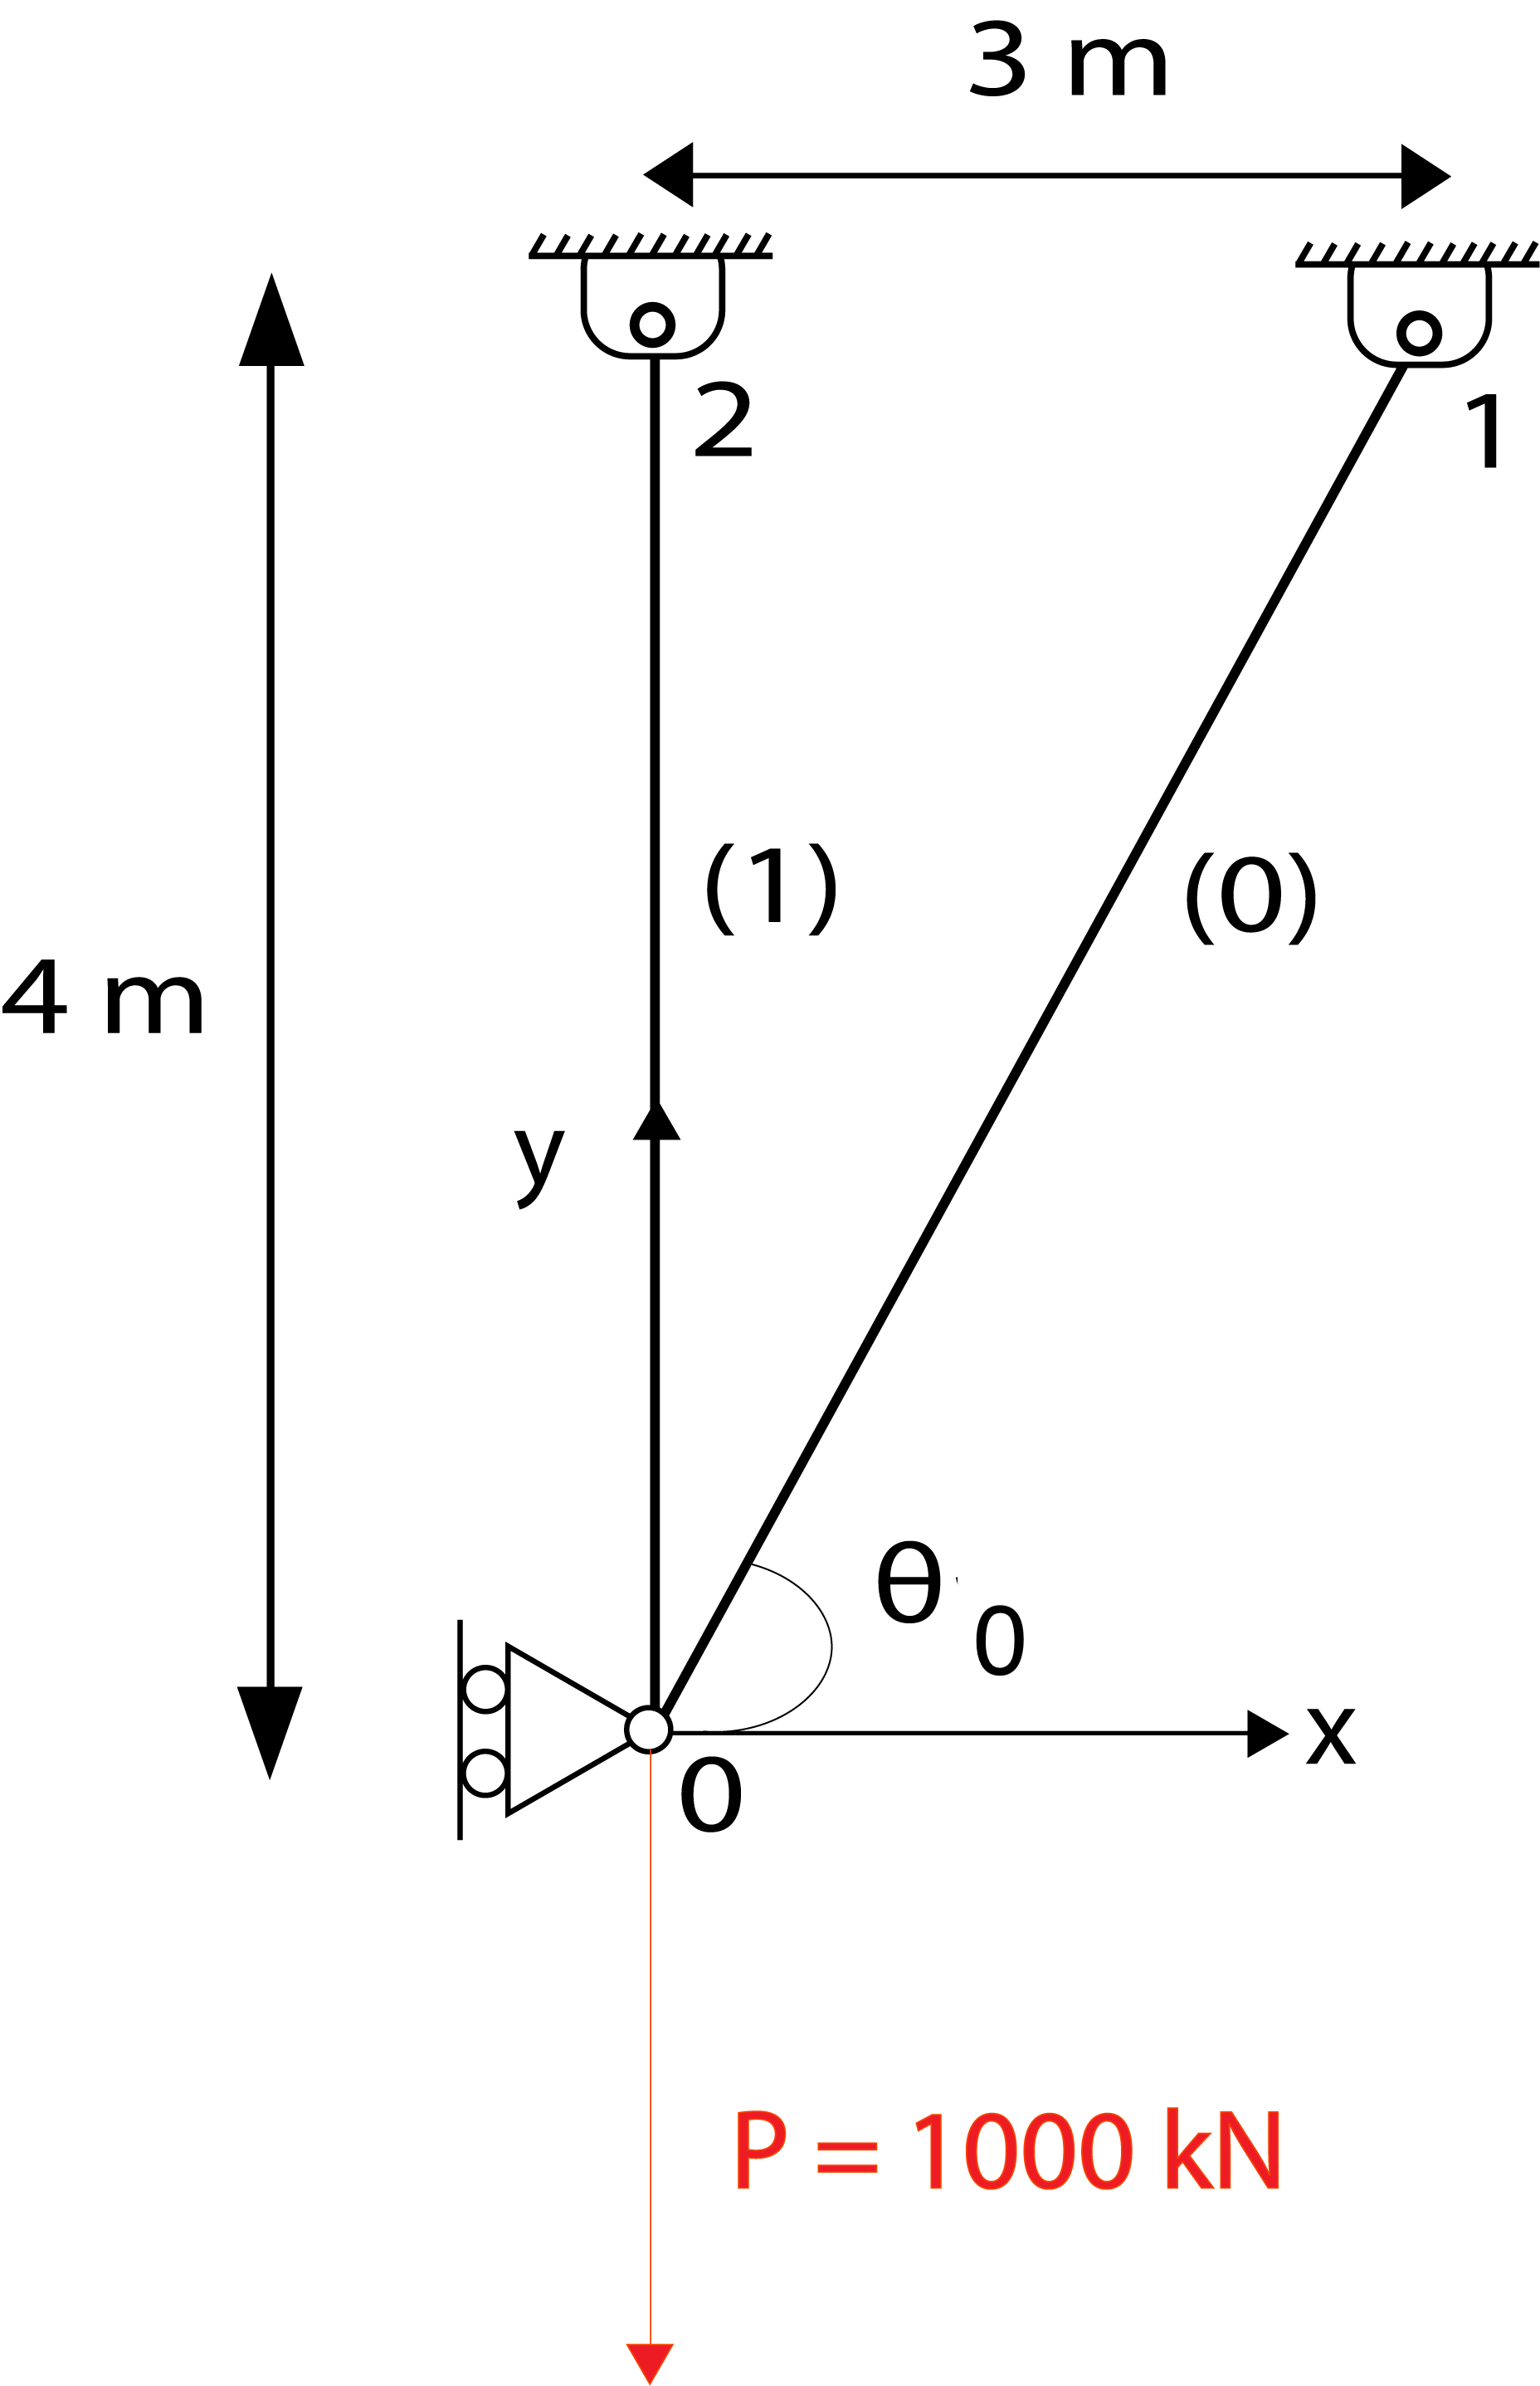

In [2]:
Image(filename = './Figures/exemple.png',  width=200, height=200)

### Objectif 

On souhaite connaître le déplacement de chacun des nœuds ainsi que les forces agissant sur ces nœuds dans la direction x et y. Dans ce but, nous détaillerons les étapes de résolution. 

#### Étape 1 : Définition des variables du problème

Expliciter :
- La matrice de position des nœuds : _positions = np.array([...])_
- La matrice de connectivité du problème : _conn = np.array([...])_
- La matrice de numérotation d'équation par nœud : _eqn_node = np.array([...])_ 
- La matrice de numérotation d'équation par élément : _eqn_elem = np.array([...])_

In [3]:
# Place your answer here

- Exprimez la rigidité $k_0$ et $k_1$ des barres 0 et 1 respectivement, à partir des propriétés de la barre. 

In [4]:
# Place your answer here

- Définissez le vecteur de rigidité $k_{vec}$ = [$k_0$, $k_1$, etc] contenant les rigidités des barres.

In [5]:
# Place your answer here

- Écrire une fonction calculant la matrice de raideur locale $K_{l}$ d'une barre, en prenant comme entrée la rigidité de la barre $k$. Attention, par rapport à la semaine dernière, nous considérons désormais un espace à deux dimensions, chaque noeud a donc 2 degrés de liberté.

In [6]:
# Place your answer here

- Expliciter cette matrice pour les barres 0 et 1.

In [7]:
# Place your answer here

- Écrire une fonction permettant de calculer la matrice de rotation $\boldsymbol{R}$, connaissant la position des nœuds, la matrice de connectivité ainsi que l'élément e considéré. 

    Pour rappel :
$\boldsymbol{R} = \begin{bmatrix} 
\boldsymbol{r} & 0 \\
0 & \boldsymbol{r}
\end{bmatrix}$ et  $\boldsymbol{r} =\frac{1}{l} \begin{bmatrix} 
x_1 - x_0 & -(y_1-y_0) \\
y_1-y_0 & x_1 - x_0
\end{bmatrix}
$
où $l = \sqrt{(x_1 - x_0)^2 + (y_1 - y_0)^2}.$

In [8]:
# Place your answer here

- Vérifier l'exactitude de votre fonction en l'appliquant pour la barre 0 et 1.

In [9]:
# Place your answer here

#### Étape 3 : Assemblage de la matrice de rigidité

- Écrire une fonction permettant d'assembler les matrices de rigidités locales dans la matrice de rigidité globale en prenant en compte: 
    - la rigidité des barres (k_vec)
    - la positions des nœuds, la matrice de connectivité (conn)
    - le nombre d'élément (nb_elem)
    - le nombre de degrés de liberté total (nb_ddl) 
    - la matrice de numérotation par élément (eqn_elem).

In [10]:
# Place your answer here

- Vérifier que la position des zéros dans la matrice $\boldsymbol{K}$ est cohérente avec les ddl.

#### Étape 4 : Conditions aux limites et calcul des réactions

- Définir les conditions aux limites (6 conditions) en force et déplacement.

---

 **Place your answer here** 

 ---



- Calculer le déplacement de la composante restante (non nulle).

In [11]:
# Place your answer here

- Calculer les réactions $\lbrace f \rbrace$ grâce à la formule $\lbrace f \rbrace$ = $[K] \lbrace d \rbrace$.

In [12]:
# Place your answer here

## Exercice 2 : Assemblage d'un système de ressorts

Lors de l’exercice 2 de la série 1, nous avons vu comment résoudre numériquement un système de ressorts assemblés en série. L’objectif de cet exercice est de standardiser le code afin de pouvoir assembler n’importe quelle configuration de ressorts. Cette standardisation est réalisée en définissant une matrice de connectivité. Le rôle de la matrice de connectivité est de lier la numérotation globale des nœuds (sur la structure entière) à la numérotation locale (sur un seul élément).

1. Considérons la numérotation locale de la figure suivante correspondant à un ressort de rigidité $k^e$ à deux degrés de liberté $u^e_1$ et $u^e_2$. Écrivez une fonction calculant la matrice de rigidité locale $\boldsymbol{K^l_{ij}}$ (2x2) pour cet élément ressort.

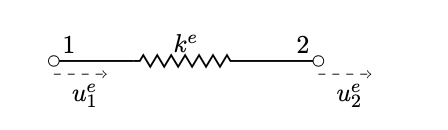

In [13]:
Image(filename = './Figures/assemblage_ressort.png',  width=300, height=300)

In [14]:
# Place your answer here

2. Nous allons à présent modéliser le système de ressorts suivant composé de 4 éléments et de 5 nœuds. Exprimez la matrice de connectivité $\boldsymbol{C}$ (4x2) du système de la figure suivante :

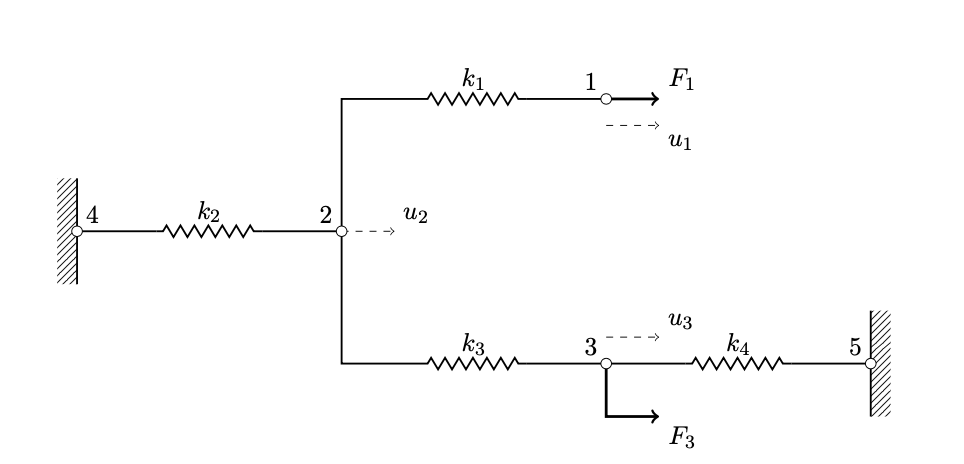

In [15]:
Image(filename = './Figures/systeme_ressort.png',  width=500, height=500)

In [16]:
# Place your answer here

3. La matrice de connectivité permet ainsi de standardiser l'assemblage de matrices de rigidité locales $\boldsymbol{K^l}$ dans la matrice de rigidité du système $\boldsymbol{K}$. La fonction d'assemblage a été définie dans l'exercice précédemment. Une simplification de cette fonction dans le cas d'éléments non inclinés est telle que : 

In [17]:
def AssemblerMatriceRigidite_ex2(ki, nb_elem, nb_ddl, conn):
    K = np.zeros((nb_ddl, nb_ddl))
    for e in range(nb_elem):
        Kl = CalculerMatriceRigiditeLocale_ex2(ki)
        idx = conn[e, :]
        for i, gi in enumerate(idx):
            for j, gj in enumerate(idx):
                K[gi, gj] += Kl[i, j]
    return K


Vérifiez que la matrice de rigidité assemblée correspondent à celle prédite analytiquement lors de l’exercice 3.4 de la série 1 avec $k_i$=4.

In [18]:
# Place your answer here

4. Appliquez les conditions limites du système $u_4$ = $u_5$ = 0 et résolvez numériquement le système pour $k_i$ = 4, $F_1$ = 12, $F_2$ = 0 et $F_3$ = −9.

In [19]:
# Place your answer here

## Exercice 3 : Modélisation d'une structure en treillis

Pour cette exercice, nous souhaitons étudier la déformation d’un pont ferroviaire en treillis à l’aide du code développé dans l’exercice 1. 

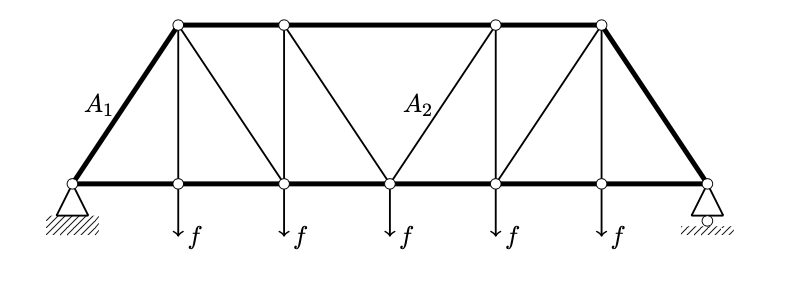

In [20]:
Image(filename = './Figures/exercice1.png',  width=400, height=400)

avec :
   - $E$ = 210 GPa 
   - $A_1$ = 20 000 $mm^2$ 
   - $A_2$ = 10 000 $mm^2$ 
   - $f$ = 100 kN

On donne la matrice de connectivité et les positions des nœuds définis comme suit :

In [21]:
positions = np.array([
    [0, 0],
    [4, 0],
    [8, 0],
    [12, 0],
    [16, 0],
    [20, 0],
    [24, 0],
    [4, 6],
    [8, 6],
    [16, 6],
    [20, 6]
])

conn = np.array([
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6],
    [0, 7],
    [7, 8],
    [8, 9],
    [9, 10],
    [10, 6],
    [1, 7],
    [2, 8],
    [4, 9],
    [5, 10],
    [2, 7],
    [3, 8],
    [3, 9],
    [4, 10],
])

1. Cette structure est discrétisée à l’aide d’éléments barres dont la rigidité hors plan est supposée nulle. Écrire l’expression de la matrice de rigidité locale pour l’élément barre présenté à la figure suivante :

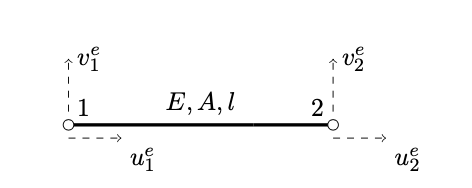

In [22]:
Image(filename = './Figures/exercice1_q1.png',  width=300, height=300)

---

 **Place your answer here** 

 ---



2. Construisez une fonction calculant la matrice de numérotation par élément $E_{qe}$ à partir de la matrice de connectivité prenannt en entrée :
    - la matrice de connectivité ;
    - le nombre d'éléments ;
    - le nombre de ddl ;
    - le nombre de nœuds par élément ;
    - le nombre de ddl par nœuds.
    
Vérifiez le résultat obtenu.

In [23]:
# Place your answer here

3. Une fois la matrice de raideur $K$ définie grâce à la fonction _AssemblerMatriceRigidite_, il est possible d'afficher son profil avec le commande :

    _mh.ColoredMatrix(K).profile(remove_zeros=True)_
   
Étant donné que nous nous intéressons pas aux valeurs exactes des coefficients, nous fixons la rigidité de chaque barre arbitrairement à 1. Commenter le profil obtenu.

In [24]:
# Place your answer here

---

 **Place your answer here** 

 ---



4. Appliquez les conditions d'appuis et calculez les déplacements ainsi que les forces en chacun des nœuds.

In [25]:
# Place your answer here

In [26]:
# Place your answer here